# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today to a new dataset.

👇 Download the Cars.csv and place it in the data folder. Load into this notebook as a pandas dataframe named df, and display its first 5 rows.

In [2]:
import numpy as np # linear algebra
import pandas as pd 

df=pd.read_csv("cars.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


ℹ️ The description of the dataset is available . Make sure to use refer to it through the exercise.

# Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [3]:
#ici on compte le nombre de duplicate
dups=df.duplicated().value_counts()
dups

False    205
dtype: int64

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make changes effective in the dataset `df`.

In [4]:
#on observe ici qu'il n'y a pas de valeur nulle 
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations of missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since there is less than 30% of missing values.
</details> 

In [5]:
# YOUR CODE HERE
#print(df['carwidth'].unique())
#print(df.isnull().values.any())
#print(df['carwidth'].isnull().values.any())


#comme nous n'avons pas de valeur null on cherche uniquement les '*' garce a cette boucle, il n'y en a pas non plus 
for i in range(len(df['carwidth'])):
    if df['carwidth'][i]=='*':
        print(df['carwidth'][i])


## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is front, impute with the most frequent.
</details>

In [6]:
# ici on cherche la valeur la plus frequente et la moins frequente 
print(df['enginelocation'].value_counts())
for i in range(len(df['enginelocation'])):
    if df['enginelocation'][i]==None or df['enginelocation'][i]=='':
        df['enginelocation'][i]='front'

front    202
rear       3
Name: enginelocation, dtype: int64


# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

peakrm describe:  count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64






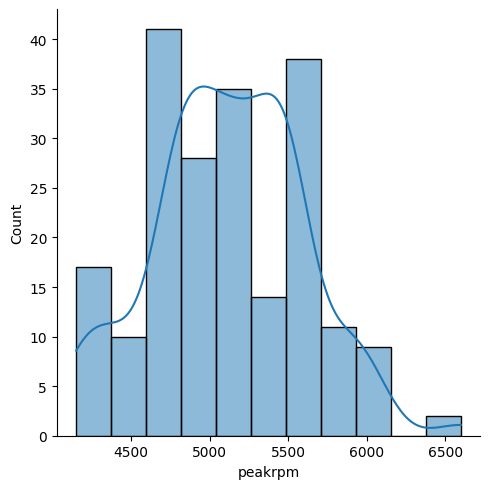

In [7]:
# ici on plot le nombre de "peakrm" et on affiche ses statistiques 
def output():
    print('\n\n\n')
import matplotlib.pyplot as plt
import seaborn as sns
print('peakrm describe: ',df['peakrpm'].describe())
sns.displot(df['peakrpm'],kde=True)
output()

carwidth describe:  count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64


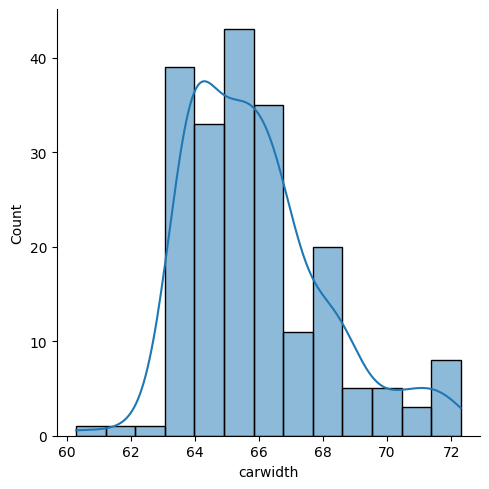

In [8]:
# idem que pour "peakrm"
print('carwidth describe: ',df['carwidth'].describe())
sns.displot(df['carwidth'],kde=True)

stroke describe:  count    205.000000
mean       3.255415
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


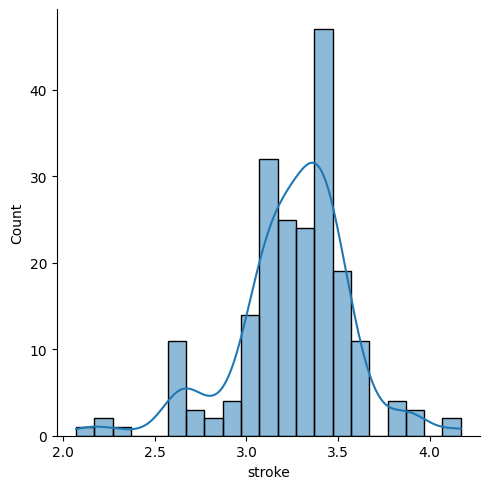

In [9]:
#idem que pour "peakrm"

print('stroke describe: ',df['stroke'].describe())
sns.displot(df['stroke'],kde=True)

In [10]:
#on applique RobustScaler sur les features qui nous interessent 

from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
scaler.fit(df['price'].values.reshape(-1,1))
df['price']=scaler.transform(df['price'].values.reshape(-1,1))

In [11]:

scaler.fit(df['peakrpm'].values.reshape(-1,1))
df['peakrpm']=scaler.transform(df['peakrpm'].values.reshape(-1,1))

In [12]:
scaler = RobustScaler()
scaler.fit(df['stroke'].values.reshape(-1,1))
df['stroke']=scaler.transform(df['stroke'].values.reshape(-1,1))

In [13]:
scaler = RobustScaler()
scaler.fit(df['carwidth'].values.reshape(-1,1))
df['carwidth']=scaler.transform(df['carwidth'].values.reshape(-1,1))


stroke describe:  count    205.000000
mean      -0.115285
std        1.045323
min       -4.066667
25%       -0.600000
50%        0.000000
75%        0.400000
max        2.933333
Name: stroke, dtype: float64




carwidth describe:  count    205.000000
mean       0.145645
std        0.766144
min       -1.857143
25%       -0.500000
50%        0.000000
75%        0.500000
max        2.428571
Name: carwidth, dtype: float64




peakrm describe:  count    205.000000
mean      -0.106969
std        0.681408
min       -1.500000
25%       -0.571429
50%        0.000000
75%        0.428571
max        2.000000
Name: peakrpm, dtype: float64


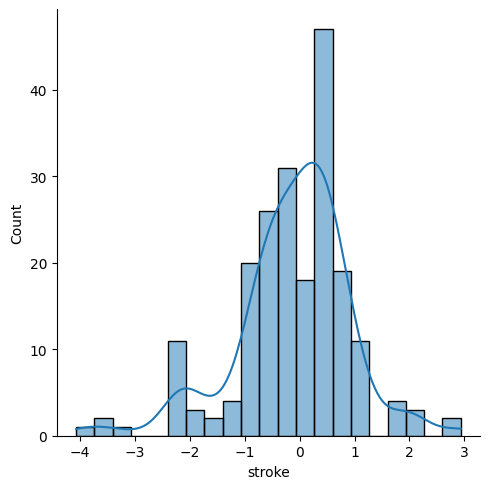

In [14]:
print('stroke describe: ',df['stroke'].describe())
output()
sns.displot(df['stroke'],kde=True)
print('carwidth describe: ',df['carwidth'].describe())
output()
print('peakrm describe: ',df['peakrpm'].describe())

## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [15]:
# Ici on applique StandardScaler 
from sklearn.preprocessing import StandardScaler
print('curbweight describe: ',df['curbweight'].describe())
scaler = StandardScaler()
scaler.fit(df['curbweight'].values.reshape(-1,1))
df['curbweight']=scaler.transform(df['curbweight'].values.reshape(-1,1))
output()
print('curbweight describe after: ',df['curbweight'].describe())

curbweight describe:  count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64




curbweight describe after:  count    2.050000e+02
mean     1.126470e-16
std      1.002448e+00
min     -2.055348e+00
25%     -7.904486e-01
50%     -2.725519e-01
75%      7.305117e-01
max      2.907988e+00
Name: curbweight, dtype: float64


In [16]:
# YOUR CODE HERE

# Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features by their encoded version(s).

## `aspiration` & `enginelocation`

In [17]:
# YOUR CODE HERE

print(df['aspiration'].unique())
print(df['enginelocation'].unique())


['std' 'turbo']
['front' 'rear']


In [18]:
# YOUR CODE HERE


df = pd.get_dummies(df,prefix=['aspiration'], columns = ['aspiration'], drop_first=True)
df = pd.get_dummies(df,prefix=['enginelocation'], columns = ['enginelocation'], drop_first=True)
df.head()
# encoder=OneHotEncoder(handle_unknown='ignore')
# encoder.fit(data['GarageFinish'].values.reshape(-1,1))
# transformed = encoder.transform(data['GarageFinish'].values.reshape(-1,1))
# ohe_df = pd.DataFrame(transformed)

# data = pd.concat([data, ohe_df], axis=1).drop(['GarageFinish'])
# ohe_df = pd.DataFrame(donnees)
# data = pd.concat([data, ohe_df], axis=1).drop(['GarageFinish'], axis=1)

,car_ID,symboling,CarName,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_turbo,enginelocation_rear
0,1,3,alfa-romero giulia,gas,two,convertible,rwd,88.6,168.8,-0.500000,...,3.47,-2.033333,9.0,111,-0.285714,21,27,0.367183,0,0
1,2,3,alfa-romero stelvio,gas,two,convertible,rwd,88.6,168.8,-0.500000,...,3.47,-2.033333,9.0,111,-0.285714,21,27,0.711991,0,0
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,94.5,171.2,0.000000,...,2.68,0.600000,9.0,154,-0.285714,19,26,0.711991,0,0
3,4,2,audi 100 ls,gas,four,sedan,fwd,99.8,176.6,0.250000,...,3.19,0.366667,10.0,102,0.428571,24,30,0.419392,0,0
4,5,2,audi 100ls,gas,four,sedan,4wd,99.4,176.6,0.321429,...,3.19,0.366667,8.0,115,0.428571,18,22,0.820998,0,0


In [19]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration_turbo',
       'enginelocation_rear'],
      dtype='object')

## `enginetype`

In [20]:
# YOUR CODE HERE
df['enginetype'].describe()
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [24]:
# df = pd.get_dummies(df,prefix=['enginetype'], columns = ['enginetype'], drop_first=True)

import category_encoders

mapping = [
    {
        'col': 'enginetype',
        'mapping':{
            'dohc': 1,
            'ohcv': 2,
            'ohc': 3,
            'l':4,
            'rotor':5,
            'ohcf':6,
            'dohcv':7
        }
    }
]


encoder = category_encoders.OrdinalEncoder(
    cols = ['enginetype'],
    return_df = True,
    mapping = mapping
)
e=encoder.fit_transform(df['enginetype'])
df['enginetype']=e

In [25]:
df['enginetype'].unique()

array([1, 2, 3, 4, 5, 6, 7])

## `cylindernumber`

In [26]:
# YOUR CODE HERE
df['cylindernumber'].describe()
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [27]:

mapping = [
    {
        'col': 'cylindernumber',
        'mapping':{
            'four': 4,
            'five': 5,
            'six': 6,
            'three':3,
            'twelve':12,
            'two':2,
            'eight':8
        }
    }
]


encoder = category_encoders.OrdinalEncoder(
    cols = ['cylindernumber'],
    return_df = True,
    mapping = mapping
)
e=encoder.fit_transform(df['cylindernumber'])
df['cylindernumber']=e


In [28]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

## `price`

👇 Encode the target `price`.

In [29]:
# YOUR CODE HERE
df['price'].unique()
#Encoding price to Yes or No answer :If price > mean of all prices then No (1), otherwise Yes (2)
m=np.mean(df['price'])
for i in range(len(df['price'])):
    if df['price'][i]>=m:
        df['price'][i]=1
    else:
        df['price'][i]=2
        
print(df['price'].unique())

[1. 2.]


C:\Users\Sabri\AppData\Local\Temp\ipykernel_26244\3755777532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i]=1
C:\Users\Sabri\AppData\Local\Temp\ipykernel_26244\3755777532.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i]=2


# Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make changes effective in the dataframe `df`.

In [30]:
print(df['fueltype'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['fuelsystem'].unique())
df=df.drop(['fueltype','carbody','drivewheel','fuelsystem'], axis=1)
df.columns

['gas' 'diesel']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'aspiration_turbo', 'enginelocation_rear'],
      dtype='object')

In [31]:
# YOUR CODE HERE
df=df.drop(['CarName','doornumber'], axis=1)
categ = df.select_dtypes(exclude='number')
print(categ)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[205 rows x 0 columns]


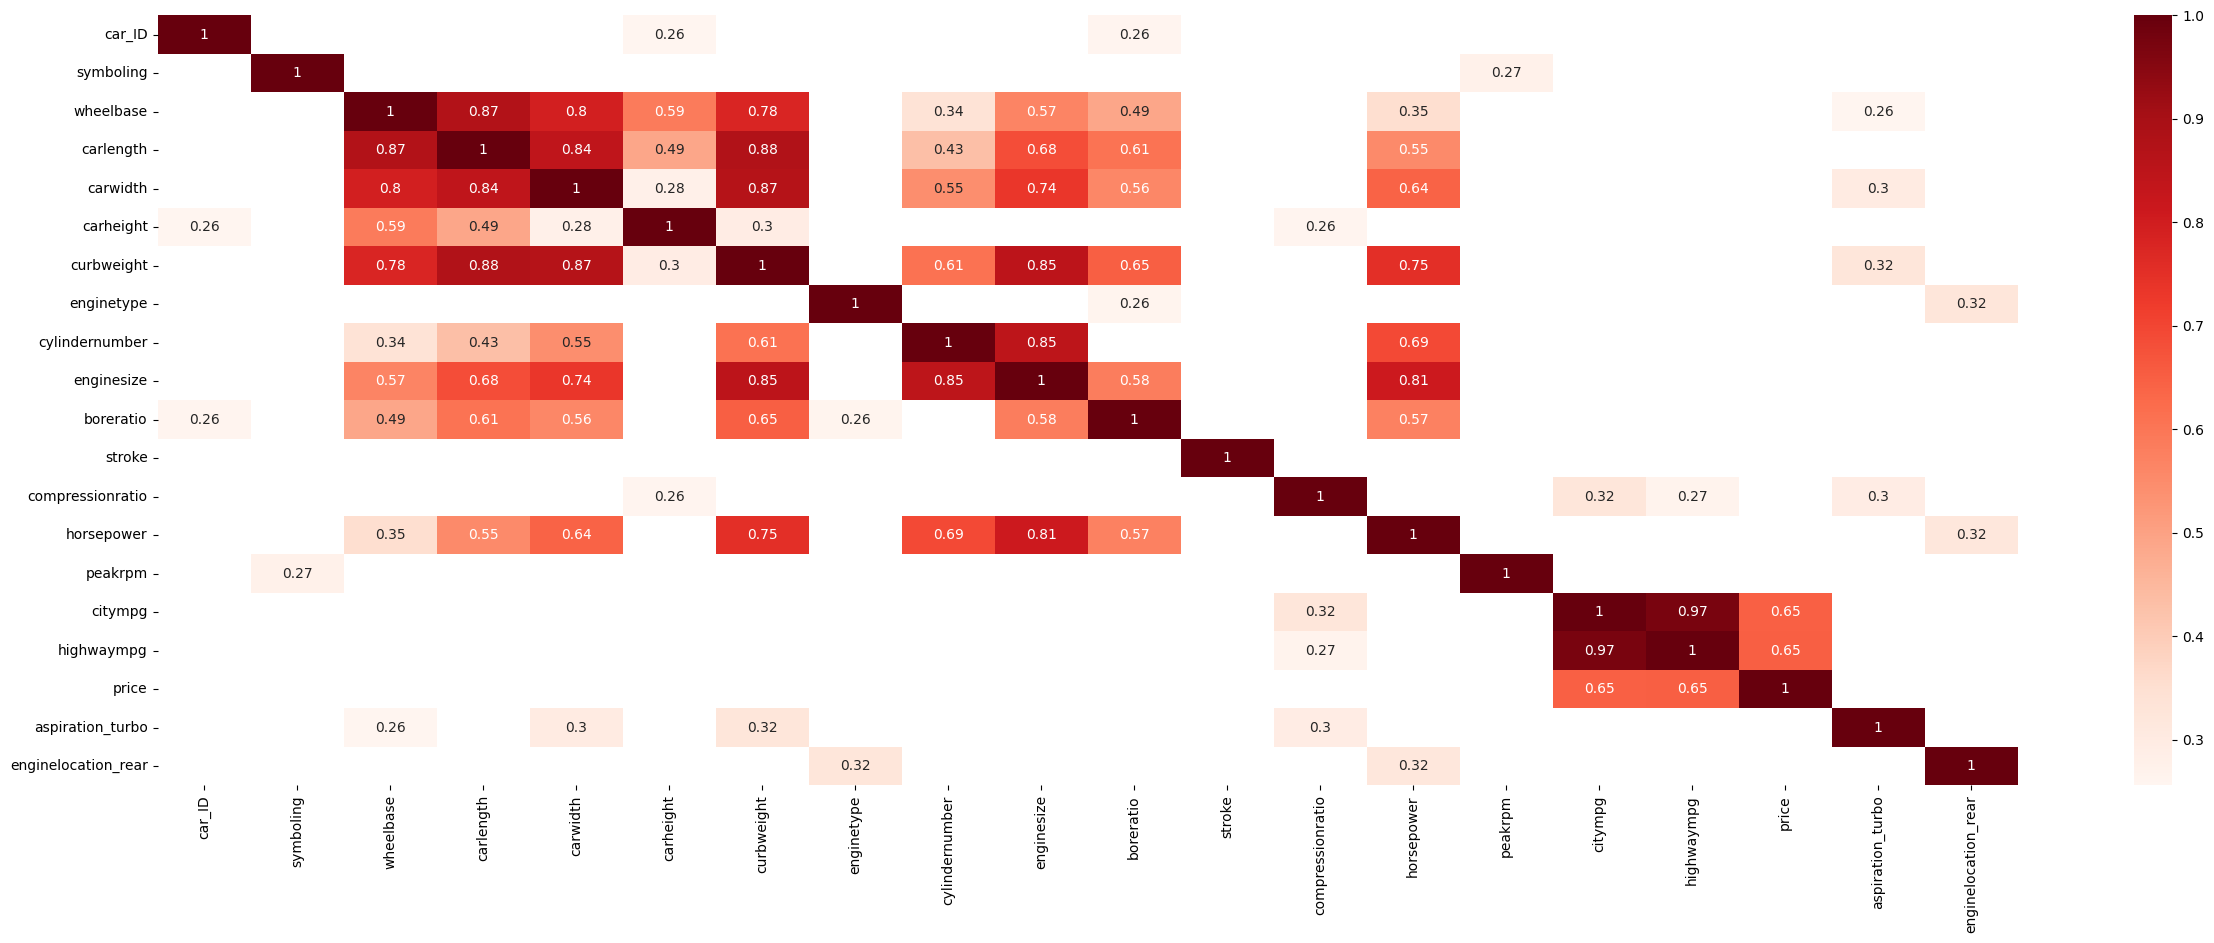

'\nAs we know our target is price of the car ,so now we should see the most related features to our target.Lets define the treshold 65%\nThese features are : horsepower,enginesize,cylindernumber,curbweight,carwidth\n\n'

In [32]:
#sns.heatmap(df.corr())
dfCorr=df.corr()
filteredDf = dfCorr[(dfCorr >=.25)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf,annot=True, cmap="Reds")
plt.show()
'''
As we know our target is price of the car ,so now we should see the most related features to our target.Lets define the treshold 65%
These features are : horsepower,enginesize,cylindernumber,curbweight,carwidth

'''

In [33]:
fixed_columns=['horsepower','enginesize','cylindernumber','curbweight','carwidth']
all_columns=list(df.columns)
new_df=df.drop([item for item in all_columns if item not in fixed_columns], axis=1)
new_df.head()

,carwidth,curbweight,cylindernumber,enginesize,horsepower
0,-0.500000,-0.014566,4,130,111
1,-0.500000,-0.014566,4,130,111
2,0.000000,0.514882,6,152,154
3,0.250000,-0.420797,4,109,102
4,0.321429,0.516807,5,136,115


ℹ️ Out of the highly correlated feature pairs, remove the one with less granularity.

# Base Modelling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [34]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

print(new_df)
X_train, X_test, y_train, y_test = train_test_split(df[['horsepower','enginesize','cylindernumber','curbweight','carwidth']], df['price'], test_size=25)

logr = LogisticRegression()
print(X_train)
fitted=logr.fit(X_train,y_train)
cv_results = cross_validate(fitted, X_test,y_test )
score=cv_results['test_score'].mean()

print('my mean score is ',score)

     carwidth  curbweight  cylindernumber  enginesize  horsepower
0   -0.500000   -0.014566               4         130         111
1   -0.500000   -0.014566               4         130         111
2    0.000000    0.514882               6         152         154
3    0.250000   -0.420797               4         109         102
4    0.321429    0.516807               5         136         115
..        ...         ...             ...         ...         ...
200  1.214286    0.763241               4         141         114
201  1.178571    0.949992               4         141         160
202  1.214286    0.878757               6         173         134
203  1.214286    1.273437               6         145         106
204  1.214286    0.975021               4         141         114

[205 rows x 5 columns]
     horsepower  enginesize  cylindernumber  curbweight  carwidth
136         160         121               4    0.486003  0.357143
31           76          92               4   -1.418

# Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. With that strong feature set, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [35]:
# YOUR CODE HERE
'''
So let's try to increase our treshold to 75%.Npw we should get rid of some columns like carwidth and cylindrnumber ,so our final X will be :

'horsepower','enginesize','curbweight'

'''

"\nSo let's try to increase our treshold to 75%.Npw we should get rid of some columns like carwidth and cylindrnumber ,so our final X will be :\n\n'horsepower','enginesize','curbweight'\n\n"

In [36]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(df[['horsepower','enginesize','curbweight']], df['price'], test_size=25)

logr = LogisticRegression()
print(X_train)
fitted=logr.fit(X_train,y_train)
cv_results = cross_validate(fitted, X_test,y_test )
strong_model_score=cv_results['test_score'].mean()

print('my mean score is ',strong_model_score)

     horsepower  enginesize  curbweight
179         161         171    0.886458
6           110         136    0.555313
47          176         258    2.907988
145         111         108   -0.087726
83          145         156    0.703558
..          ...         ...         ...
12          121         164    0.297327
196         114         141    0.730512
185          85         109   -0.661456
133         110         121    0.268448
50           68          91   -1.281391

[180 rows x 3 columns]
my mean score is  0.9199999999999999


# 🏁